In this assignment students have to make ARIMA model over shampoo sales data and check the MSE between predicted and actual value.

Student can download data in .csv format from the following link:

https://datamarket.com/data/set/22r0/sales-of-shampoo-over-a-three-year-period#!ds=22r0&display=line

In [1]:
import pandas as pd
from pandas import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def parser(x):
    return datetime.strptime('190'+x,'%Y-%m')

sales = pd.read_csv("shampoo-sales.csv",index_col =0, parse_dates=[0],date_parser = parser)
#sales = pd.read_csv("shampoo-sales.csv",index_col =0)
sales



,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3
1901-06-01,168.5
1901-07-01,231.8
1901-08-01,224.5
1901-09-01,192.8


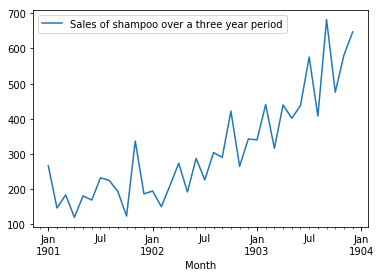

In [3]:
sales.plot()


#### Stationary means mean,variance and covariance is constant over periods.



C:\Users\prashant_gupta1\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


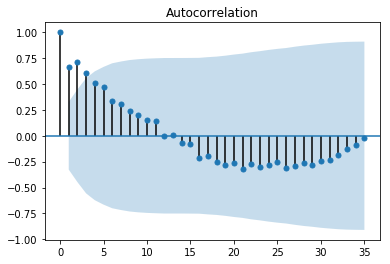

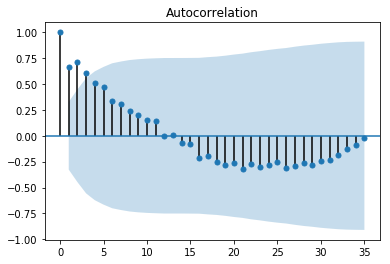

In [4]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(sales)

### Converting series to stationary


In [5]:
sales.head()


,Sales of shampoo over a three year period
Month,
1901-01-01,266.0
1901-02-01,145.9
1901-03-01,183.1
1901-04-01,119.3
1901-05-01,180.3


In [6]:
sales.shift(1)


,Sales of shampoo over a three year period
Month,
1901-01-01,NaN
1901-02-01,266.0
1901-03-01,145.9
1901-04-01,183.1
1901-05-01,119.3
1901-06-01,180.3
1901-07-01,168.5
1901-08-01,231.8
1901-09-01,224.5


In [7]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

In [8]:
sales_diff = sales_diff[1:]
sales_diff.head()


,Sales of shampoo over a three year period
Month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8


In [9]:
sales.shift(1)


,Sales of shampoo over a three year period
Month,
1901-01-01,NaN
1901-02-01,266.0
1901-03-01,145.9
1901-04-01,183.1
1901-05-01,119.3
1901-06-01,180.3
1901-07-01,168.5
1901-08-01,231.8
1901-09-01,224.5


In [10]:
sales_diff = sales.diff(periods=1)
#integrated of order 1, denoted by d(for diff), one of the parameter of ARIMA model

In [11]:
sales_diff = sales_diff[1:]
sales_diff.head()

,Sales of shampoo over a three year period
Month,
1901-02-01,-120.1
1901-03-01,37.2
1901-04-01,-63.8
1901-05-01,61.0
1901-06-01,-11.8


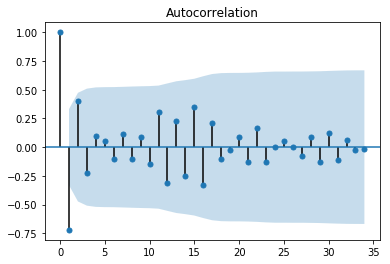

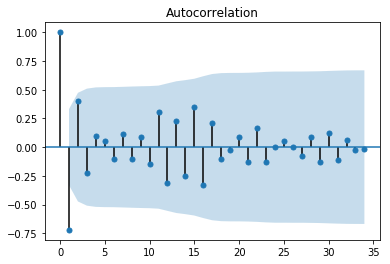

In [12]:
plot_acf(sales_diff)


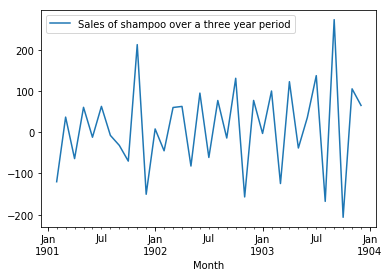

In [13]:
sales_diff.plot()


In [14]:
X = sales.values
train = X[0:28] # 27 data as train data
test = X[28:] # 9 data as test data
print(train.size)
print(test.size)
predictions = []

28
8


#### ARIMA model

In [15]:
from statsmodels.tsa.arima_model import ARIMA


In [16]:

import itertools
p=d=q=range(0,6)
pdq=list(itertools.product(p,d,q))
pdq


[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (0, 0, 3),
 (0, 0, 4),
 (0, 0, 5),
 (0, 1, 0),
 (0, 1, 1),
 (0, 1, 2),
 (0, 1, 3),
 (0, 1, 4),
 (0, 1, 5),
 (0, 2, 0),
 (0, 2, 1),
 (0, 2, 2),
 (0, 2, 3),
 (0, 2, 4),
 (0, 2, 5),
 (0, 3, 0),
 (0, 3, 1),
 (0, 3, 2),
 (0, 3, 3),
 (0, 3, 4),
 (0, 3, 5),
 (0, 4, 0),
 (0, 4, 1),
 (0, 4, 2),
 (0, 4, 3),
 (0, 4, 4),
 (0, 4, 5),
 (0, 5, 0),
 (0, 5, 1),
 (0, 5, 2),
 (0, 5, 3),
 (0, 5, 4),
 (0, 5, 5),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (1, 0, 3),
 (1, 0, 4),
 (1, 0, 5),
 (1, 1, 0),
 (1, 1, 1),
 (1, 1, 2),
 (1, 1, 3),
 (1, 1, 4),
 (1, 1, 5),
 (1, 2, 0),
 (1, 2, 1),
 (1, 2, 2),
 (1, 2, 3),
 (1, 2, 4),
 (1, 2, 5),
 (1, 3, 0),
 (1, 3, 1),
 (1, 3, 2),
 (1, 3, 3),
 (1, 3, 4),
 (1, 3, 5),
 (1, 4, 0),
 (1, 4, 1),
 (1, 4, 2),
 (1, 4, 3),
 (1, 4, 4),
 (1, 4, 5),
 (1, 5, 0),
 (1, 5, 1),
 (1, 5, 2),
 (1, 5, 3),
 (1, 5, 4),
 (1, 5, 5),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2),
 (2, 0, 3),
 (2, 0, 4),
 (2, 0, 5),
 (2, 1, 0),
 (2, 1, 1),
 (2, 1, 2),
 (2, 1, 3),
 (2, 1, 4),
 (2,

In [17]:
import warnings
warnings.filterwarnings('ignore')
for param in pdq:
    try:
        model_arima = ARIMA(train, order=param)
        model_arima_fit = model_arima.fit()
        print(param,model_arima_fit.aic)
    except:
        continue


(0, 0, 0) 335.09040511436183
(0, 0, 1) 334.3872829960065
(0, 0, 2) 329.3188116463245
(0, 0, 3) 330.92416191329755
(0, 0, 4) 326.20991814556083
(0, 0, 5) nan
(0, 1, 0) 324.4220452613395
(0, 1, 1) 308.00170527527325
(0, 1, 2) 306.76985736180313
(0, 2, 0) 343.4502397203673
(0, 2, 1) 318.2621879566042
(1, 0, 0) 330.891809426
(1, 0, 1) 325.6333949306371
(1, 0, 2) 322.4525346634769
(1, 1, 0) 309.11887677524066
(1, 1, 1) 306.79093608912103
(1, 1, 2) 306.91086651441833
(1, 1, 3) 311.87130308527367
(1, 1, 4) 309.11946068137985
(1, 1, 5) 314.62738257879744
(1, 2, 0) 317.80308367611093
(1, 2, 1) 304.28854627184654
(1, 2, 4) 301.84243592770645
(2, 0, 0) 322.0934945916866
(2, 0, 1) 323.6906512129914
(2, 1, 0) 310.4797159942252
(2, 1, 1) 308.67508697382726
(2, 1, 4) 310.7392463440925
(2, 1, 5) 309.26130294792756
(2, 2, 0) 317.2438967005482
(2, 2, 1) 305.70536447196343
(2, 2, 3) 301.9734131614505
(3, 0, 0) 324.0564894664129
(3, 0, 1) 345.56189420353957
(3, 1, 0) 305.2133148241061
(3, 1, 1) 306.470299

#### It seems that out of different combinations ranging from order (0,0,0) to (5,5,5) param with values as p=3, d=2 and q=3 is the best because of lowest AIC value



In [18]:
#p,d,q 
#p -> Periods taken for auto regressive model
#d -> Integrated order, difference
#q -> Periods in moving average model
model_arima = ARIMA(train, order=(3,2,3))
model_arima_fit = model_arima.fit()
print(model_arima_fit.aic)

298.77068698523084


In [19]:
predictions = model_arima_fit.forecast(steps=8)[0]
predictions

array([334.25497944, 464.33196912, 426.08758442, 496.34781322,
       443.78522094, 500.24819382, 504.44186036, 564.70722907])

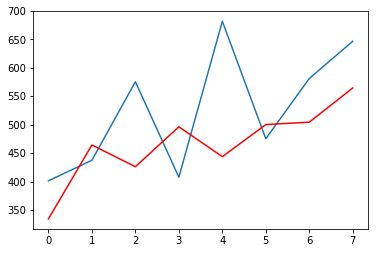

In [20]:
plt.plot(test)
plt.plot(predictions, color='red')

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(test,predictions)

13181.51607295262